In [48]:
import pandas as pd

#load file
file_path = "tsla_total.csv"
df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
df = df.sort_index()
df['day_total_vol'] = df['day_total_vol']/10000000
print(df.head())

#generate lags of previous trade volume
for lag in range(1, 5):
    df[f"day_total_vol_L{lag}"] = df["day_total_vol"].shift(lag)


df_2024 = df.loc["2024"].dropna()

#divide timelime by Jan to Sep, Oct to Dec
train = df_2024.loc["2024-01":"2024-09"]
test = df_2024.loc["2024-10":"2024-12"]


y_train = train["TSLA_first_hour_vol"]
y_test = test["TSLA_first_hour_vol"]
lags = [f"day_total_vol_L{i}" for i in range(1, 5)]

#model using arithmatic average sentiment score
X_train_mean = train.drop(columns=["day_total_vol","TSLA_first_hour_vol", "abs_sentiment_score"])
X_test_mean = test.drop(columns=["day_total_vol","TSLA_first_hour_vol", "abs_sentiment_score"])

#model using abs_sentiment_score
X_train_absscore = train.drop(columns=["day_total_vol","TSLA_first_hour_vol", "mean"])
X_test_absscore = test.drop(columns=["TSLA_first_hour_vol", "mean","day_total_vol"])

X_train_mean = X_train_mean[lags + list(X_train_mean.columns)]
X_test_mean = X_test_mean[lags + list(X_test_mean.columns)]

X_train_absscore = X_train_absscore[lags + list(X_train_absscore.columns)]
X_test_absscore = X_test_absscore[lags + list(X_test_absscore.columns)]

            TSLA_first_hour_vol      mean       std  abs_sentiment_score  \
date                                                                       
2024-01-02             3.642728  0.249787  0.360836             0.315842   
2024-01-03             4.091339  0.118213  0.346186             0.230460   
2024-01-04             3.146526  0.238166  0.455237             0.386341   
2024-01-05             3.025293 -0.068738  0.229072             0.149590   
2024-01-08             2.573891  0.178594  0.402761             0.347576   

            news_count  is_option_expiry  is_first_trading_day  \
date                                                             
2024-01-02          31                 0                     1   
2024-01-03          30                 0                     0   
2024-01-04          16                 0                     0   
2024-01-05          22                 0                     0   
2024-01-08          19                 0                     0   

    

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#SARIMAX model using normal mean
model_mean = SARIMAX(y_train, exog=X_train_mean, order=(1,1,1), seasonal_order=(0,0,0,0))
sarimax_result_mean = model_mean.fit()

#display summary
print(sarimax_result_mean.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09585D+00    |proj g|=  1.24084D+00

At iterate    5    f=  1.05927D+00    |proj g|=  2.39664D-01

At iterate   10    f=  1.04540D+00    |proj g|=  7.55670D-02

At iterate   15    f=  1.03753D+00    |proj g|=  1.15551D-01

At iterate   20    f=  1.03276D+00    |proj g|=  2.00606D-01

At iterate   25    f=  1.02604D+00    |proj g|=  4.66561D-02

At iterate   30    f=  1.02444D+00    |proj g|=  8.86474D-02

At iterate   35    f=  1.02100D+00    |proj g|=  4.26667D-02

At iterate   40    f=  1.01982D+00    |proj g|=  5.61399D-02

At iterate   45    f=  1.01805D+00    |proj g|=  1.72180D-02

At iterate   50    f=  1.01744D+00    |proj g|=  7.33145D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
#generate SARIMAX model using abs score
model_absscore = SARIMAX(y_train, exog=X_train_absscore, order=(1,1,1), seasonal_order=(0,0,0,0))
sarimax_result_absscore = model_absscore.fit()

#display model summary
print(sarimax_result_absscore.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08859D+00    |proj g|=  1.29435D+00

At iterate    5    f=  1.05169D+00    |proj g|=  2.11193D-01

At iterate   10    f=  1.03821D+00    |proj g|=  5.80735D-02

At iterate   15    f=  1.03439D+00    |proj g|=  1.17673D-01

At iterate   20    f=  1.02670D+00    |proj g|=  1.09136D-01

At iterate   25    f=  1.02029D+00    |proj g|=  2.97065D-02

At iterate   30    f=  1.01806D+00    |proj g|=  7.10811D-02

At iterate   35    f=  1.01494D+00    |proj g|=  2.55868D-01

At iterate   40    f=  1.01233D+00    |proj g|=  9.24195D-02

At iterate   45    f=  1.01064D+00    |proj g|=  2.31804D-01

At iterate   50    f=  1.00989D+00    |proj g|=  8.64841D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
# predict future first hour trade volume
forecast_mean = sarimax_result_mean.forecast(steps=len(X_test_mean), exog=X_test_mean)
forecast_absscore = sarimax_result_absscore.forecast(steps=len(X_test_absscore), exog=X_test_absscore)

forecast_mean.index = y_test.index
forecast_absscore.index = y_test.index

#compare dataframe
comparison_df = pd.DataFrame({
    "Actual TSLA_volume": y_test,
    "Predicted (mean)": forecast_mean,
    "Predicted (abs_sentiment_score)": forecast_absscore
})

print(comparison_df.head())

            Actual TSLA_volume  Predicted (mean)  \
date                                               
2024-10-01            2.553376          2.505119   
2024-10-02            3.878096          3.275117   
2024-10-03            2.138208          3.257345   
2024-10-04            2.742879          2.507192   
2024-10-07            1.960581          2.756535   

            Predicted (abs_sentiment_score)  
date                                         
2024-10-01                         2.583405  
2024-10-02                         3.190977  
2024-10-03                         3.279475  
2024-10-04                         2.522291  
2024-10-07                         2.817661  


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


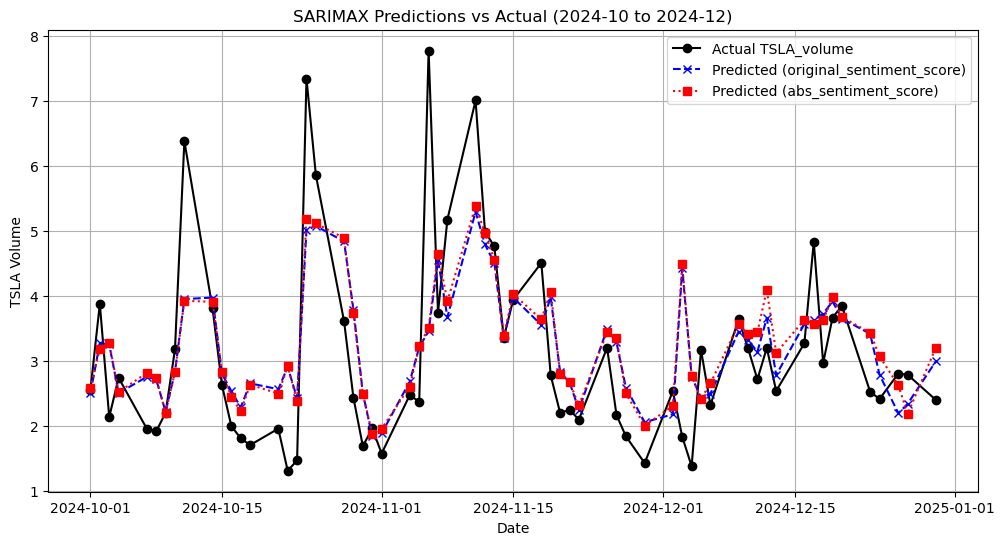

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual TSLA_volume", marker="o", color="black")
plt.plot(forecast_mean, label="Predicted (original_sentiment_score)", linestyle="dashed", marker="x", color="blue")
plt.plot(forecast_absscore, label="Predicted (abs_sentiment_score)", linestyle="dotted", marker="s", color="red")
plt.legend()
plt.title("SARIMAX Predictions vs Actual (2024-10 to 2024-12)")
plt.xlabel("Date")
plt.ylabel("TSLA Volume")
plt.grid(True)
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#calculate error
mse_mean = mean_squared_error(y_test, forecast_mean)
mae_mean = mean_absolute_error(y_test, forecast_mean)

mse_absscore = mean_squared_error(y_test, forecast_absscore)
mae_absscore = mean_absolute_error(y_test, forecast_absscore)

print(f"Using mean -> MSE: {mse_mean:.2f}, MAE: {mae_mean:.2f}")
print(f"Using abs_sentiment_score -> MSE: {mse_absscore:.2f}, MAE: {mae_absscore:.2f}")

Using mean -> MSE: 1.09, MAE: 0.75
Using abs_sentiment_score -> MSE: 1.09, MAE: 0.76
